<a href="https://colab.research.google.com/github/JorgeDanilo/Data_Science/blob/master/analise_das_avalia%C3%A7%C3%B5es_entre_os_tres_apps_de_busca_de_vagas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Análise das Avaliações entre os Três principais Apps de Busca de Vagas de Trabalho**



![alt text](https://t2.tudocdn.net/513573?w=646&h=284)


##**Objetivo**

O dados dos aplicativos da Play Store têm um enorme potencial para levar as empresas que desenvolvem ao sucesso, tendo como base principal de feeback as avaliações de seus usuários. O objetivo desse projeto é analisar esses dados e avaliar os sentimentos que os usuários tem em relação a cada plataforma, com o intuito de trazer dados para ajudar os desenvolvedores a entender as principais diferenças de sentimento dos usuários da plataforma entre ambos.

A coluna **"Score"** representa a classificação que o úsuario deu para o aplicativo.

## **O que é classificar um app?**

Na Play Store (loja de aplicativo da google), classificar um app significa deixar a sua nota de avaliação na página de dowloand do aplicativo com ou sem comentário, a base não possui uma coluna com os comentários.

Não é obrigatório deixar uma classificação para o app mas isso ajuda e motiva os desenvolvedores.

## **Como essa classificação é feita?**

Basta clicar nas estrelas que você pretende deixar.

![alt text](https://drive.google.com/uc?id=11_EhqLg7QWcK2I0OTRCHYWGTtZKTNDkU)

##★☆☆☆☆ – Avaliação muito fraca
O usuário não gostou da aplicação, contêm um número exagerado de propagandas e a aplicação não foi bem desenvolvida.

##★★☆☆☆ – Avaliação fraca
Ainda que seja uma avaliação fraca, o usuário pode ter gostado de alguma funcionalidade do app.

##★★★☆☆ – Avaliação razoável
O usuário considera que esse aplicativo cumpriu com a sua finalidade, mas precisa melhorar em alguns aspectos, como no desing por exemplo.

##★★★★☆ – Avaliação boa
Um app com 4 estrelas já é considerado muito bom, cumpre o que promete e foi bem desenvolvido.

##★★★★★ – Avaliação ótima
O usuário considera que esse app foi bem desenvolvido, tem um bom design, ótima navegação e suas funcionalidades são boas.










In [1]:
!pip install google_play_scraper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import json
import pandas as pd
from tqdm import tqdm
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from pygments import highlight
from pygments.lexers import JsonLexer
from pygments.formatters import TerminalFormatter

from google_play_scraper import Sort, reviews, app, reviews_all

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

In [ ]:
apps_ids = [
    'br.com.catho.app.vagas.empregos', 
    'com.indeed.android.jobsearch',
    'br.com.apps.jaya.vagas'
]

In [ ]:
app_infos = []

for ap in tqdm(apps_ids):
  info = app(ap, lang='en', country='us')
  del info['comments']
  app_infos.append(info)

100%|██████████| 3/3 [00:00<00:00,  4.22it/s]


In [ ]:
app_info_df = pd.DataFrame(app_infos)
app_info_df.head()

### Buscando Todos os Comentários 

In [ ]:
catho = reviews_all('br.com.catho.app.vagas.empregos', lang='pt', country='br', sort=Sort.MOST_RELEVANT, sleep_milliseconds =0)
ideed = reviews_all('com.indeed.android.jobsearch', lang='pt', country='br', sort=Sort.MOST_RELEVANT, sleep_milliseconds =0)
vagas = reviews_all('br.com.apps.jaya.vagas', lang='pt', country='br', sort=Sort.MOST_RELEVANT, sleep_milliseconds =0)

In [ ]:
catho_df = pd.DataFrame(catho)
ideed_df = pd.DataFrame(ideed)
vagas_df = pd.DataFrame(vagas)

In [118]:
catho_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/reviews_catho.csv")
ideed_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/reviews_indeed.csv")
vagas_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/reviews_vagas.csv")

In [85]:
catho_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,f9ded1eb-748f-4805-8147-8774390585c7,Bruno Amaral,https://play-lh.googleusercontent.com/a-/ACB-R...,O aplicativo é muito funcional e sempre terá a...,4,79,2.26.8-20230309_1200,2023-03-12 23:11:44,Agradecemos sua mensagem. É muito importante s...,2021-09-22 12:07:56
1,1a294e5e-8ac2-450c-8b6a-2dde9160e88e,Tamara Santos,https://play-lh.googleusercontent.com/a/AGNmyx...,O app piora a cada atualização. 1° que não che...,1,179,NaN,2023-01-09 13:28:52,Oi Tamara! As nossas vagas são atualizadas dia...,2023-01-09 15:29:02
2,1d071dba-8eba-4f5d-927d-a3e855bd911b,Fernanda Lima,https://play-lh.googleusercontent.com/a/AGNmyx...,"O aplicativo deixa muito a desejar, por exempl...",1,470,2.19.8-20220627_1443,2022-07-03 22:50:30,"Olá Fernanda, agradecemos a sua mensagem. A no...",2022-07-04 14:09:32
3,28434fcf-ab3e-4ac3-9503-4e2d18f2697a,Um usuário do Google,https://play-lh.googleusercontent.com/EGemoI2N...,Gostaria de avaliar melhor o aplicativo. Envie...,1,234,1.2.15-20190408_0809,2019-04-23 03:17:13,"Jaqueline, temos algumas ferramentas que podem...",2019-04-26 14:21:50
4,f86b87d5-8803-474d-84fe-cdee41abc294,Ju Popa,https://play-lh.googleusercontent.com/a-/ACB-R...,"Pontos a melhorar: 1. Pelo app, ao enviar o CV...",4,20,2.13.4-20210210_1530,2021-02-23 14:29:24,"Oi Juliana, obrigada por sua avaliação e comen...",2021-02-24 11:51:59


# Verificando e Tratando dados Missing 

In [120]:
catho_df['score'].isnull().sum(), ideed_df['score'].isnull().sum(), vagas_df['score'].isnull().sum()

(0, 0, 0)

In [121]:
catho_df['content'].isnull().sum(), ideed_df['content'].isnull().sum(), vagas_df['content'].isnull().sum()

(0, 91, 2)

In [149]:
catho_df.isnull().sum()

(reviewId                   0
 userName                   1
 userImage                  0
 content                    0
 score                      0
 thumbsUpCount              0
 reviewCreatedVersion    2240
 at                         0
 replyContent               3
 repliedAt                  3
 dtype: int64,
 reviewId                    0
 userName                    0
 userImage                   0
 content                    23
 score                       0
 thumbsUpCount               0
 reviewCreatedVersion     2281
 at                          0
 replyContent            19903
 repliedAt               19903
 dtype: int64)

In [150]:
ideed_df.isnull().sum()

reviewId                    0
userName                    0
userImage                   0
content                    23
score                       0
thumbsUpCount               0
reviewCreatedVersion     2281
at                          0
replyContent            19903
repliedAt               19903
dtype: int64

In [151]:
vagas_df.isnull().sum()

reviewId                   0
userName                   0
userImage                  0
content                    2
score                      0
thumbsUpCount              0
reviewCreatedVersion    1321
at                         0
replyContent            1457
repliedAt               1457
dtype: int64

In [109]:
ideed_df = ideed_df.dropna()
ideed_df.isnull().sum()

reviewId                0
userName                0
userImage               0
content                 0
score                   0
thumbsUpCount           0
reviewCreatedVersion    0
at                      0
replyContent            0
repliedAt               0
dtype: int64

In [110]:
vagas_df = vagas_df.dropna()
vagas_df.isnull().sum()

reviewId                0
userName                0
userImage               0
content                 0
score                   0
thumbsUpCount           0
reviewCreatedVersion    0
at                      0
replyContent            0
repliedAt               0
dtype: int64

### Realizando uma amostragem com 20 mil registros aleatórios.

In [123]:
np.random.seed(1)
catho_df = catho_df.sample(20000)
ideed_df = ideed_df.sample(20000)
vagas_df = vagas_df.sample(20000)

### Desvio Padrão

In [201]:
print('catho: {0}'.format(catho_df['score'].std()))
print('ideed: {0}'.format(ideed_df['score'].std()))
print('vagas: {0}'.format(vagas_df['score'].std()))

catho: 1.6653430212328386
ideed: 1.1063496635236525
vagas: 1.2680970639143423


## Comparacao entre notas (Ruim, Neutra e Boa)

In [153]:
notaruimcatho = catho_df.query('score <= 2').score.value_counts().sum()
notaruimideed = ideed_df.query('score <= 2').score.value_counts().sum()

notaruimcatho , notaruimideed

(5315, 1670)

In [154]:
notaneutracatho = catho_df.query('score == 3').score.value_counts().sum()
notaneutraideed = ideed_df.query('score == 3').score.value_counts().sum()

print(notaneutracatho - notaneutraideed)

-507


In [155]:
notaboacatho = catho_df.query('score > 3').score.value_counts().sum()
notaboaideed = ideed_df.query('score > 3').score.value_counts().sum()

print(notaboacatho - notaboaideed)

-3138


In [156]:
notaruimcatho = catho_df.query('score <= 2').score.value_counts().sum()
notaneutracatho = catho_df.query('score == 3').score.value_counts().sum()
notaboacatho = catho_df.query('score > 3').score.value_counts().sum()


# vagas
notaruimvagas = vagas_df.query('score <= 2').score.value_counts().sum()
notaneutravagas = vagas_df.query('score == 3').score.value_counts().sum()
notaboavagas = vagas_df.query('score > 3').score.value_counts().sum()

# compartivo entre catho e vagas...
# nota ruim

print('ruim vagas', notaruimvagas)
print('neutra vagas', notaneutravagas)
print('boa vagas', notaboavagas)
print("")
print('ruim catho', notaruimcatho)
print('neutra catho', notaneutracatho)
print('boa catho', notaboacatho)

print('-------------------')

print(notaruimcatho - notaruimvagas)
print(notaneutracatho - notaneutravagas)
print(notaboacatho - notaboavagas)

ruim vagas 2529
neutra vagas 1520
boa vagas 15951

ruim catho 5315
neutra catho 1050
boa catho 13635
-------------------
2786
-470
-2316


# Amostra individual para cada Apps dos *Sentimentos*

In [157]:
def to_sentiment(rating):
  rating = int(rating)
  if rating <= 2:
    return 0
  elif rating == 3:
    return 1
  else:
    return 2
  
catho_df['sentiment'] = catho_df.score.apply(to_sentiment)
ideed_df['sentiment'] = ideed_df.score.apply(to_sentiment)
vagas_df['sentiment'] = vagas_df.score.apply(to_sentiment)

In [158]:
class_names = ['negative', 'neutral', 'positive']

(CATHO)

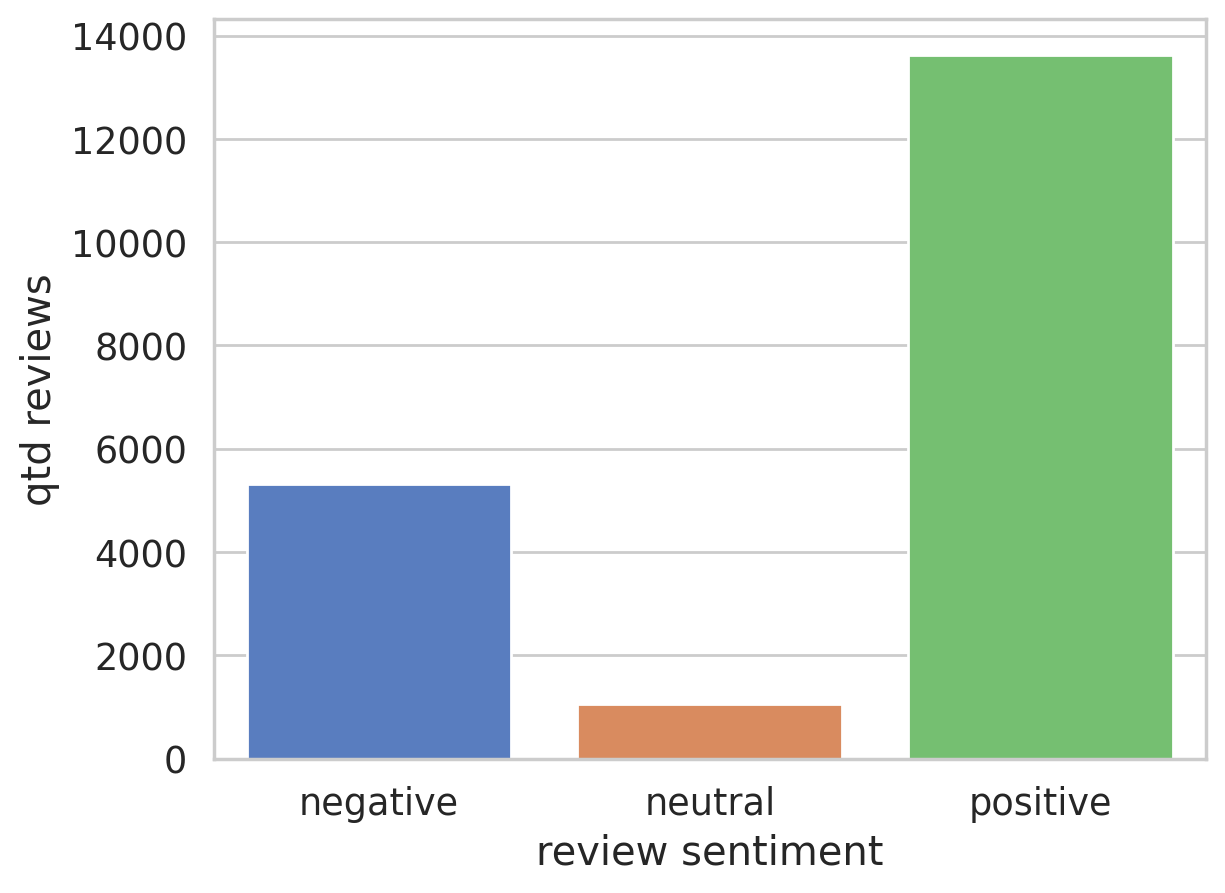

In [159]:
ax = sns.countplot(catho_df, x='sentiment')
plt.xlabel('review sentiment');
plt.ylabel('qtd reviews')
ax.set_xticklabels(class_names);

### (INDEED)

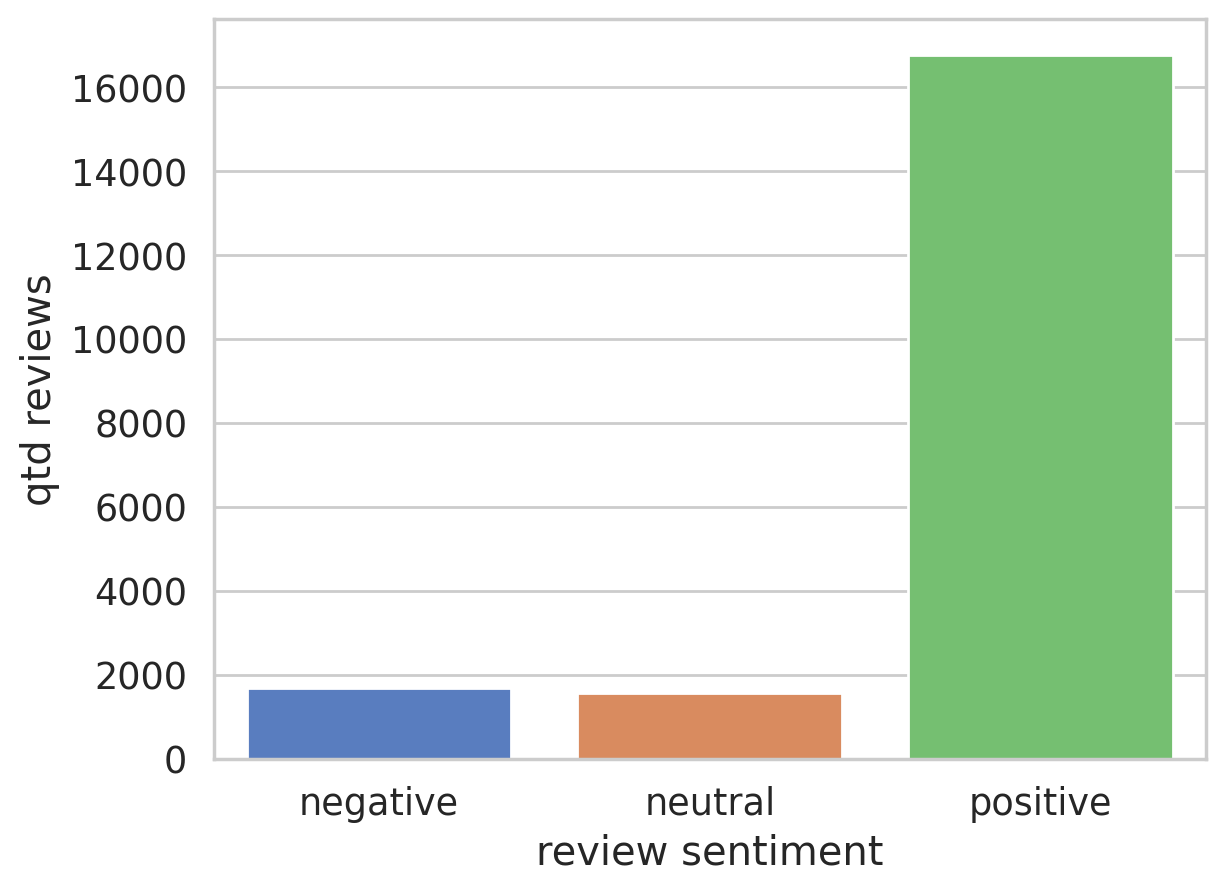

In [160]:
ax = sns.countplot(ideed_df, x='sentiment')
plt.xlabel('review sentiment')
plt.ylabel('qtd reviews')
ax.set_xticklabels(class_names);

### (VAGAS)

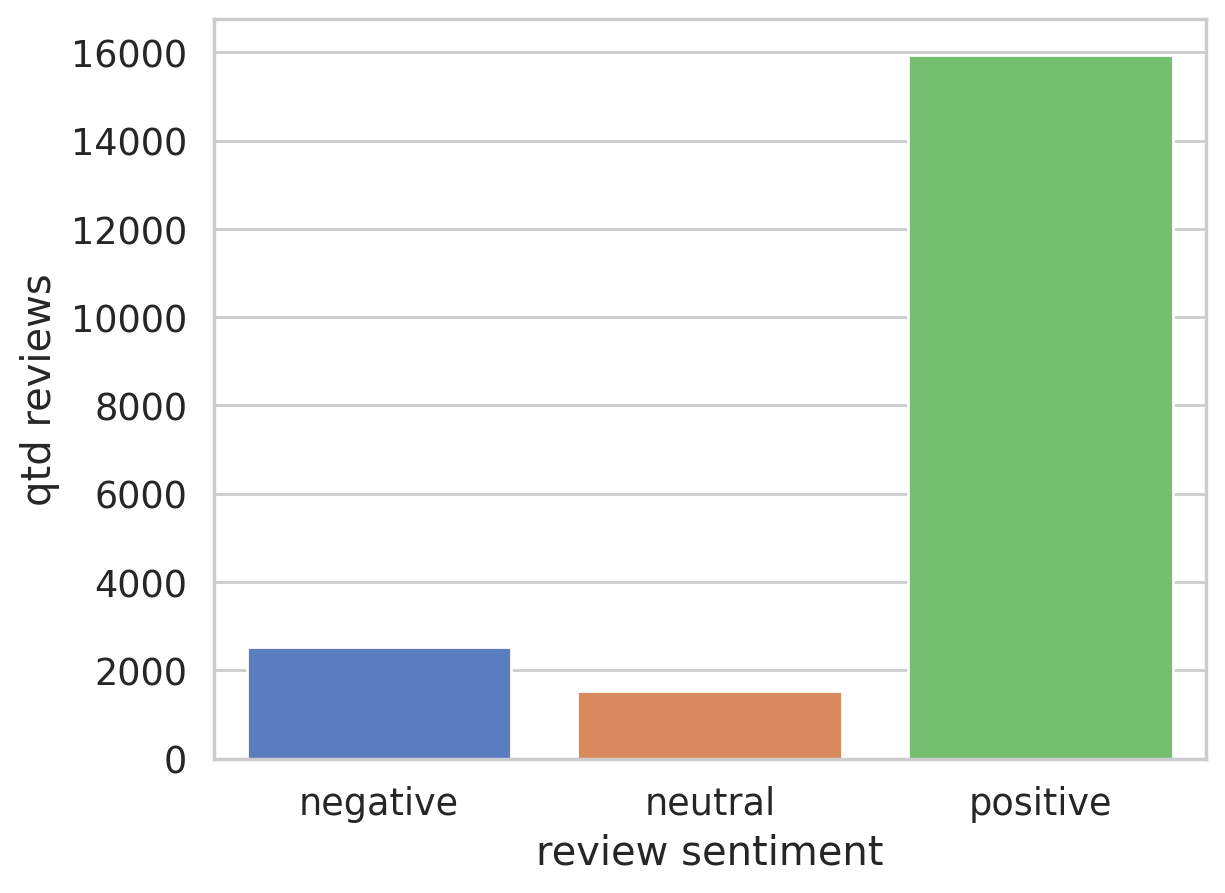

In [161]:
ax = sns.countplot(vagas_df, x='sentiment')
plt.xlabel('review sentiment')
plt.ylabel('qtd reviews')
ax.set_xticklabels(class_names);

In [162]:
import plotly.express as px

In [163]:
grafico = px.histogram(vagas_df, x='sentiment', nbins=5)
grafico.update_layout(width=400, height=400, title_text='analise de sentimento - Vagas')
grafico.show()

In [164]:
catho_df.mean()

<ipython-input-164-a507ac1cb3a8>:1: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



score            3.78770
thumbsUpCount    1.26445
sentiment        1.41600
dtype: float64

# GRÁFICOS HISTOGRAMAS

CATHO

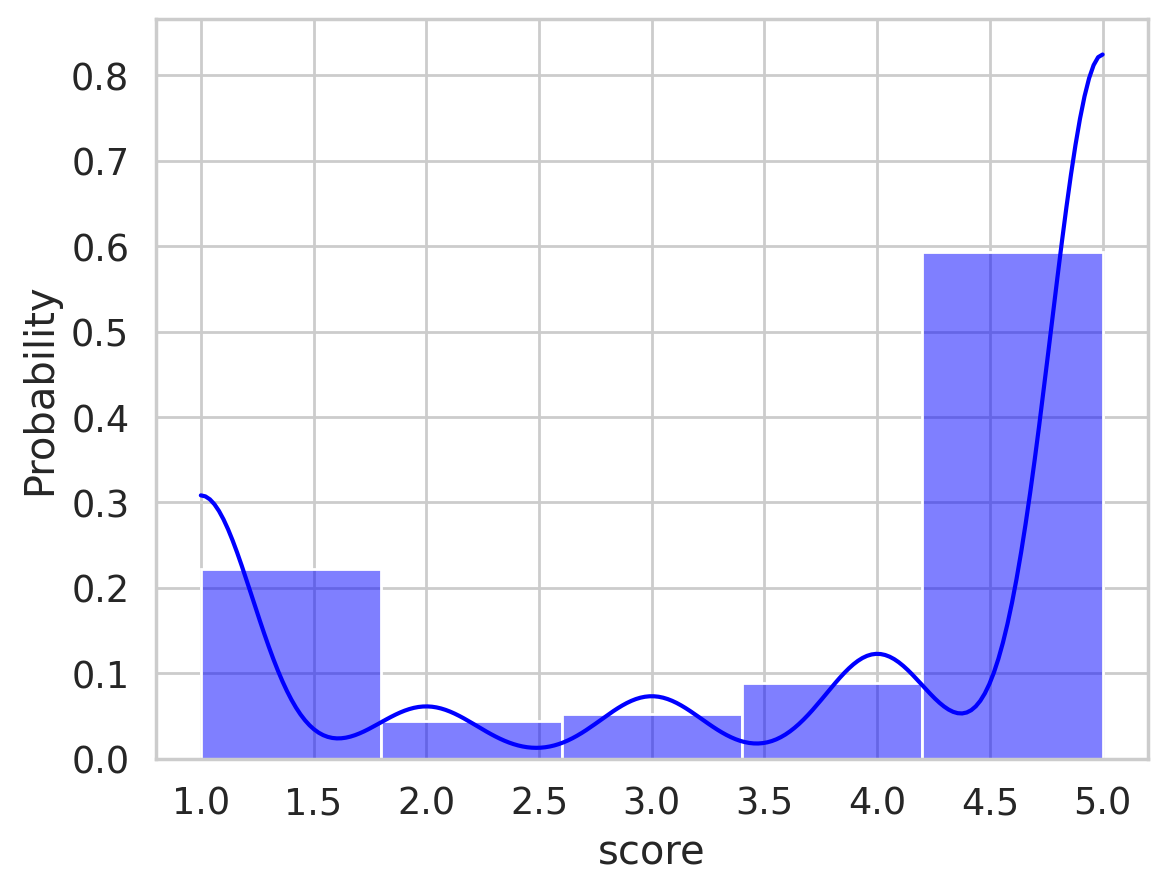

In [207]:
sns.histplot(catho_df['score'], bins=5, color="blue", kde=True, stat='probability');

INDEED

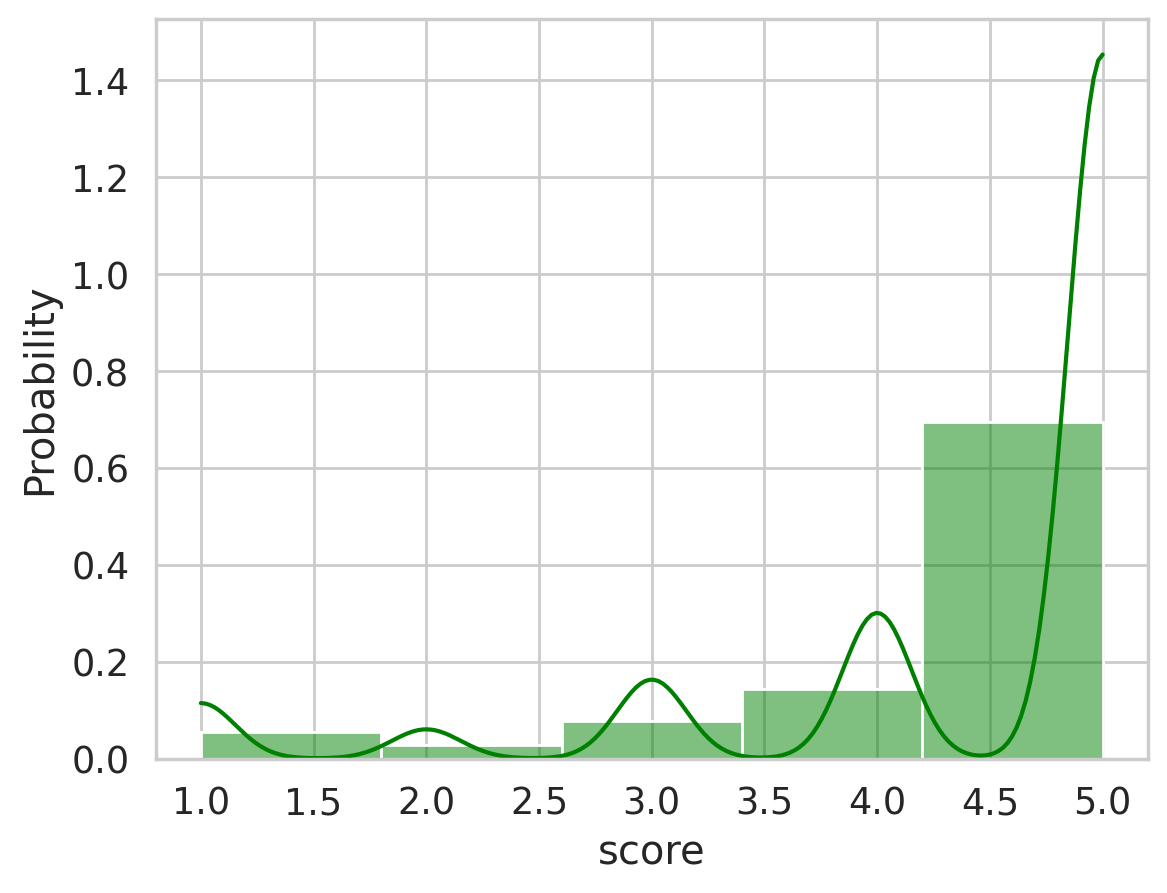

In [208]:
sns.histplot(ideed_df['score'], bins=5, color="green", kde=True, stat='probability');

VAGAS

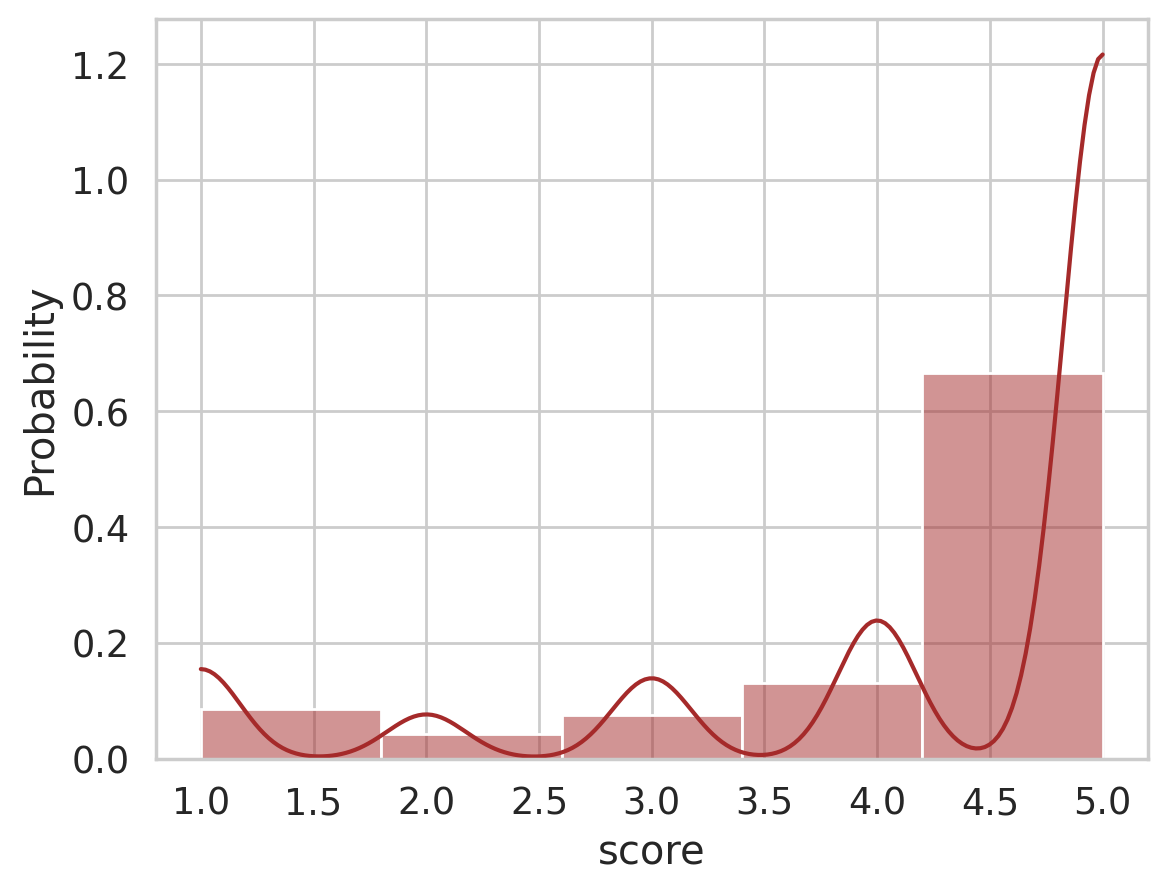

In [209]:
sns.histplot(vagas_df['score'], bins=5, color="brown", kde=True, stat='probability');

In [169]:
from collections import Counter

 # Frequencia Absoluta, mostra a quantidade de avaliações absolutas para Cada Sentimento

In [170]:
print('Catho: {0}'.format(Counter(catho_df['score'])))
print('Indeed: {0}'.format(Counter(ideed_df['score'])))
print('Vagas: {0}'.format(Counter(vagas_df['score'])))

Catho: Counter({5: 11871, 1: 4437, 4: 1764, 3: 1050, 2: 878})
Indeed: Counter({5: 13898, 4: 2875, 3: 1557, 1: 1094, 2: 576})
Vagas: Counter({5: 13336, 4: 2615, 1: 1694, 3: 1520, 2: 835})


## Variâncias das Notas de Cada Concorrente

In [171]:
catho_df['score'].var()

2.773367378368919

In [172]:
ideed_df['score'].var()

1.224009577978899

In [173]:
vagas_df['score'].var()

1.6080701635081753

## Teste de Normalidade

In [174]:
import scipy.stats as stats
import matplotlib.pyplot as plt

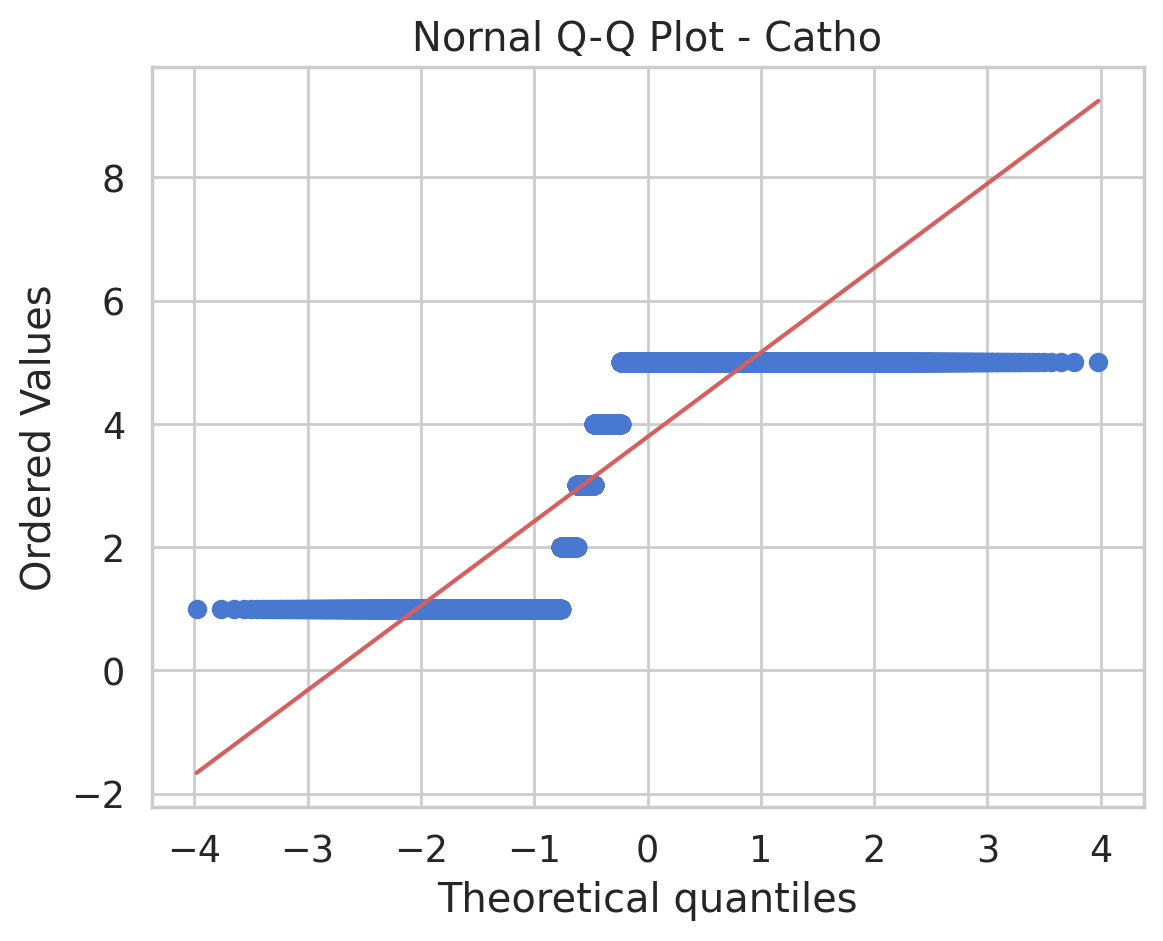

In [175]:
stats.probplot(catho_df['score'], dist='norm', plot=plt)
plt.title('Nornal Q-Q Plot - Catho')
plt.show()

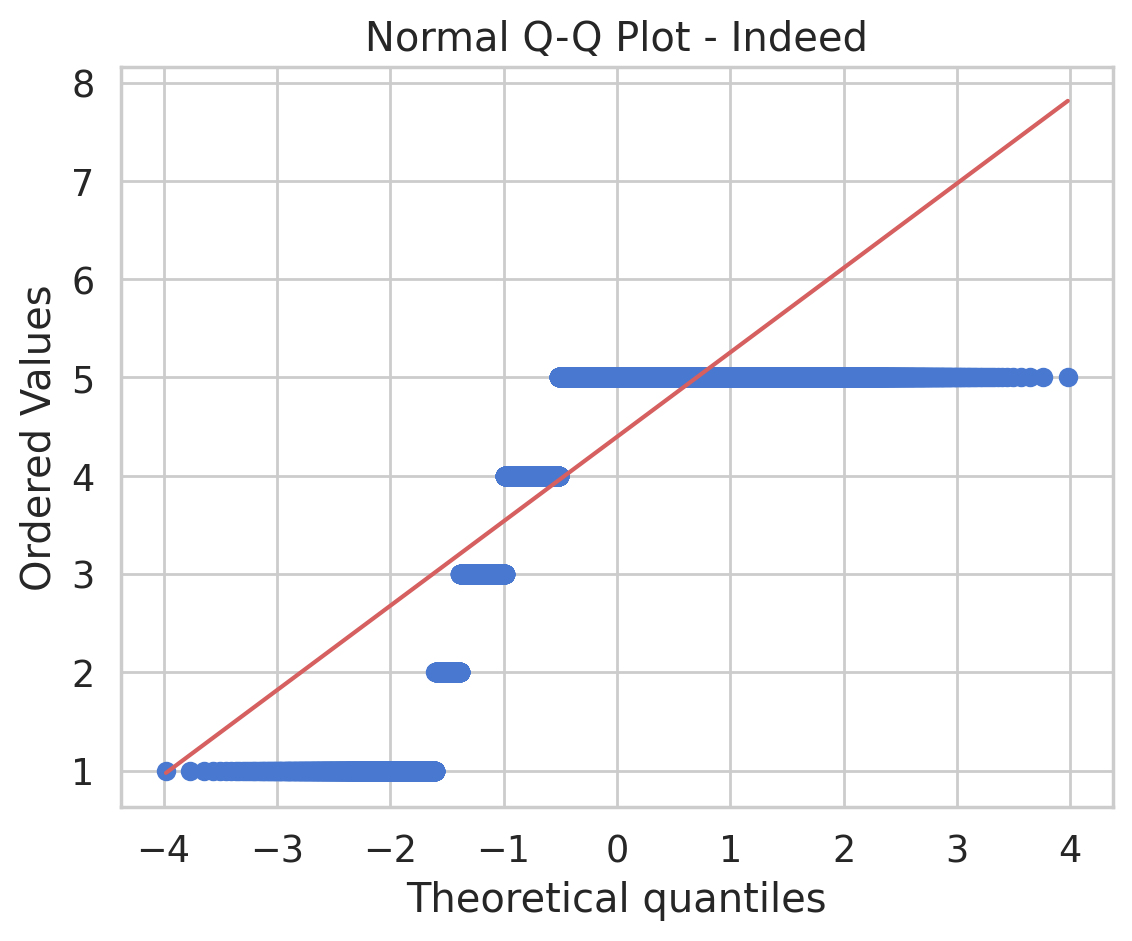

In [176]:
stats.probplot(ideed_df['score'], dist='norm', plot=plt)
plt.title('Normal Q-Q Plot - Indeed')
plt.show()

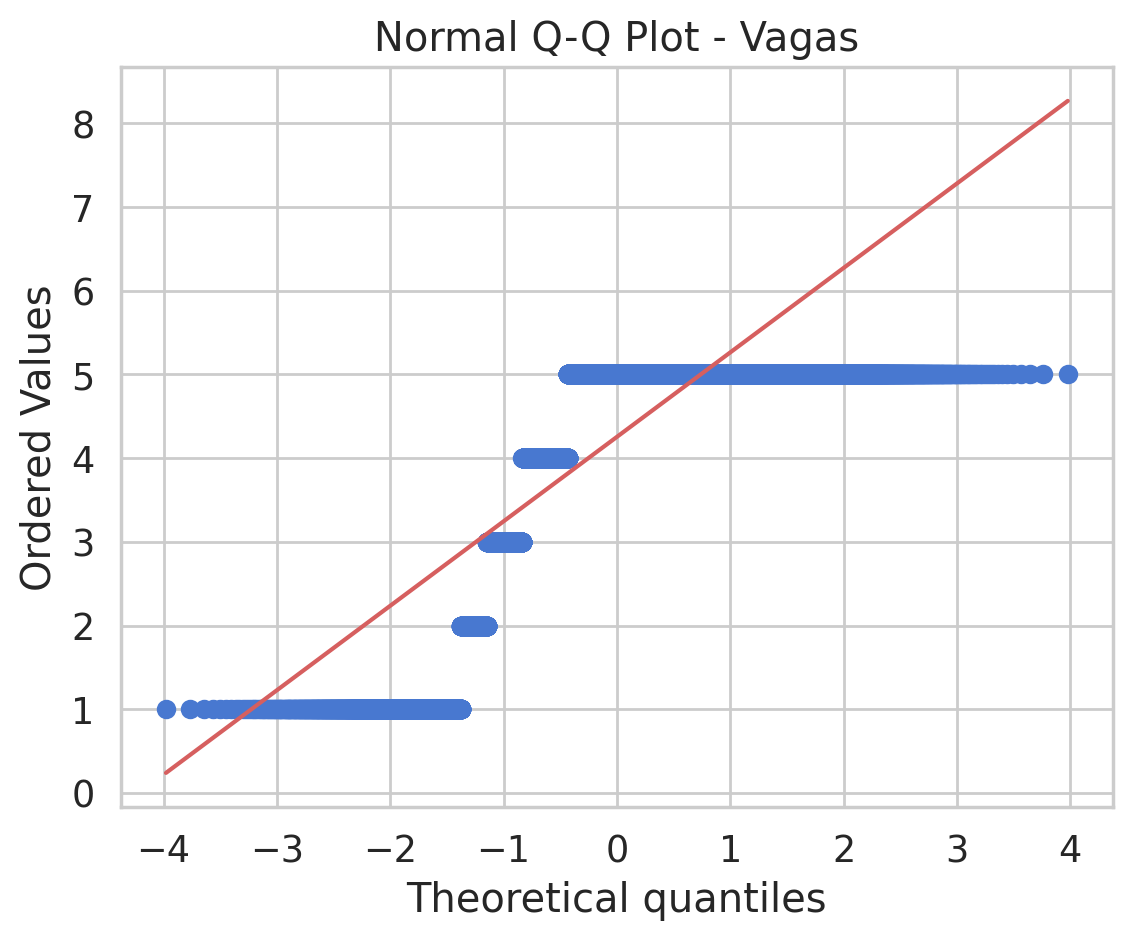

In [177]:
stats.probplot(vagas_df['score'], dist='norm', plot=plt)
plt.title('Normal Q-Q Plot - Vagas')
plt.show()

## Teste Lilliefors

CRITÉRIOS:
NÍVEL DE SIGNIFICANCIA DE 0,05 OU 5% (MAIS UTILIZADO)
QUANDO p > 0,05 (distribuição normal)



---


> Nenhum dos atributos de score dos apps, tem uma normalidade de acordo com o teste de Kolmogorov-Smirnov




In [178]:
import statsmodels
from statsmodels.stats.diagnostic import lilliefors

In [179]:
statsmodels.stats.diagnostic.lilliefors(catho_df.score, dist='norm')

(0.3602303929216393, 0.0009999999999998899)

In [180]:
statsmodels.stats.diagnostic.lilliefors(ideed_df.score, dist='norm')

(0.40254814496869823, 0.0009999999999998899)

In [181]:
statsmodels.stats.diagnostic.lilliefors(vagas_df.score, dist='norm')

(0.38884048689729117, 0.0009999999999998899)

In [ ]:
# ANDERSON

stats.anderson(catho_df.score, 'norm')

AndersonResult(statistic=3027.996169858925, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=3.785696887026843, scale=1.6663394486253307)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

## Probabilidade de Retirar um Score RUIM, NEUTRO ou BOM para Cada Concorrente

## CATHO

In [182]:
from scipy.stats import binom  

In [187]:
# Probabilidade de Retirar um score baixo

score_ruim = catho_df.loc[catho_df.score <= 2]

p = len(score_ruim) / len(catho_df)
prob_score_ruim = p * 100

prob_score_ruim

print(f'Pro ~ {prob_score_ruim} %')

Pro ~ 26.575 %


In [188]:
# Probabilidade de Retirar um score Mediano 

score_neutro = catho_df.loc[catho_df.score == 3]

p = len(score_neutro) / len(catho_df)
prob_score_neutro = p * 100

print(f'Prob ~ {prob_score_neutro} %')

Prob ~ 5.25 %


In [189]:
# Probabilidade de Retirar um Score Bom

score_bom = catho_df.loc[catho_df.score > 3]

p = len(score_bom) / len(catho_df)
prob_score_alto = p * 100

print(f'Prob ~ {prob_score_alto} %')

Prob ~ 68.175 %


### Plotagem do % de probabilidade de retirar um dos sentimentos.

In [190]:
def show_barplot_prob(probs_scores):
  Score = ['Ruim', 'Neutro', 'Bom']
  sns.barplot(x=probs_scores, y=Score,);

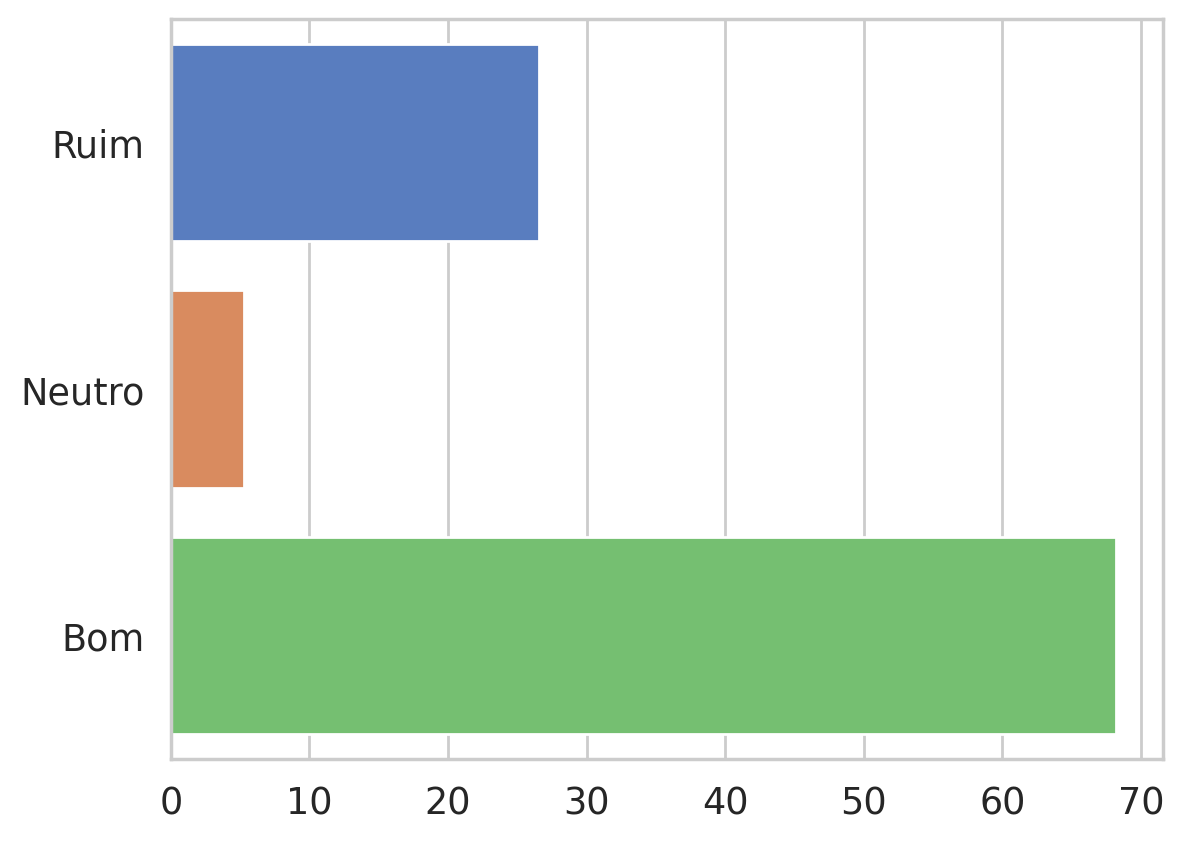

In [191]:
probs_scores = [prob_score_ruim, prob_score_neutro, prob_score_alto]
show_barplot_prob(probs_scores)

## VAGAS

In [183]:
# Probabilidade de Retirar um score baixo

score_ruim = vagas_df.loc[vagas_df.score <= 2]

p = len(score_ruim) / len(vagas_df)
prob_score_ruim = p * 100

print(f'Prob ~ {prob_score_ruim} %')

Prob ~ 12.645000000000001 %


In [184]:
# Probabilidade de Retirar um score Mediano 

score_neutro = vagas_df.loc[vagas_df.score == 3]

p = len(score_neutro) / len(vagas_df)
prob_score_neutro = p * 100

print(f'Prob ~ {prob_score_neutro} %')

Prob ~ 7.6 %


In [185]:
# Probabilidade de Retirar um Score Bom

score_bom = vagas_df.loc[vagas_df.score > 3]

p = len(score_bom) / len(vagas_df)
prob_score_alto= p * 100

print(f'Prob ~ {prob_score_alto} %')

Prob ~ 79.755 %


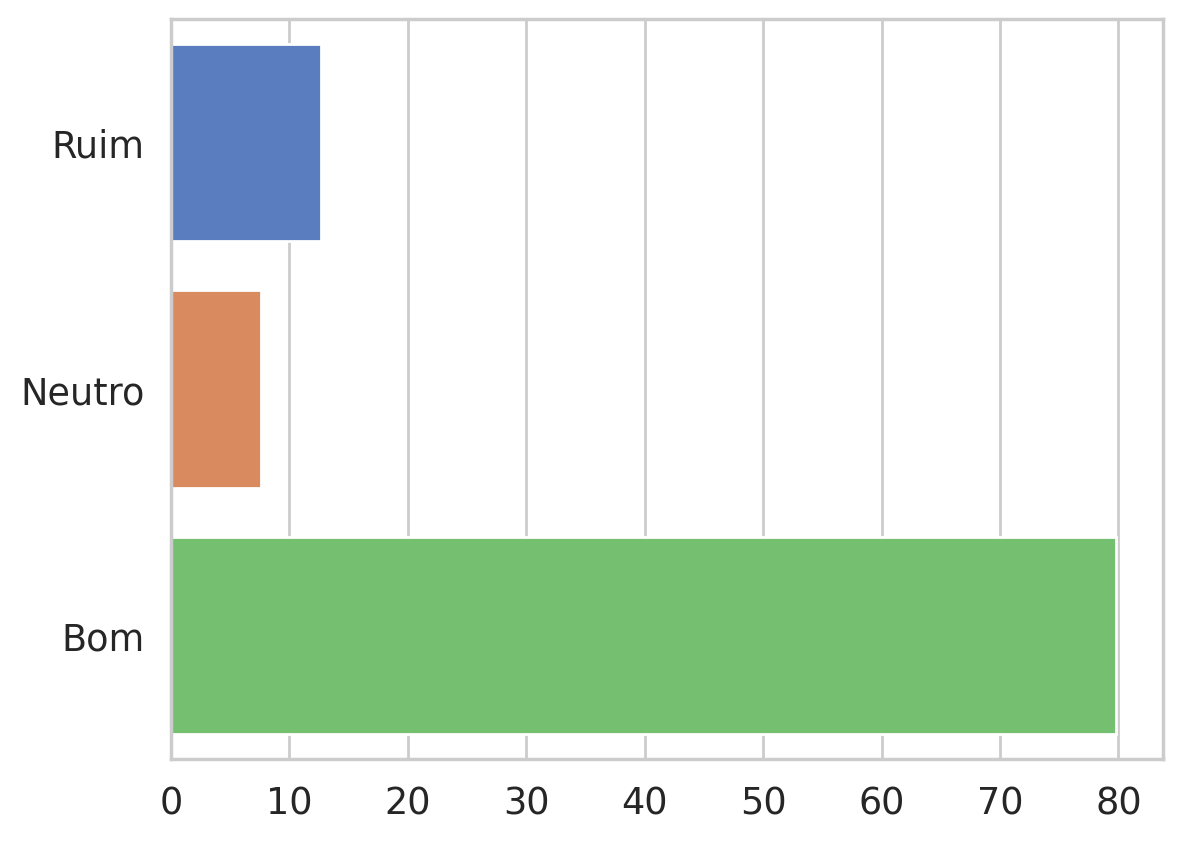

In [186]:
probs_scores = [prob_score_ruim, prob_score_neutro, prob_score_alto]
show_barplot_prob(probs_scores)

## INDEED

In [192]:
score_ruim = ideed_df.loc[ideed_df.score <= 2]

p = len(score_ruim) / len(ideed_df)
prob_score_ruim_indeed = p * 100

print(f'Prob ~ {prob_score_ruim_indeed} %')

Prob ~ 8.35 %


In [193]:
score_neutro = ideed_df.loc[ideed_df.score == 3]

p = len(score_neutro) / len(ideed_df)
prob_score_neutro_indeed = p * 100

print(f'Prob ~ {prob_score_neutro_indeed} %')

Prob ~ 7.785 %


In [194]:
score_bom = ideed_df.loc[ideed_df.score > 3]

p = len(score_bom) / len(ideed_df)
prob_score_alto_indeed = p * 100

print(f'Prob ~ {prob_score_alto_indeed} %')

Prob ~ 83.865 %


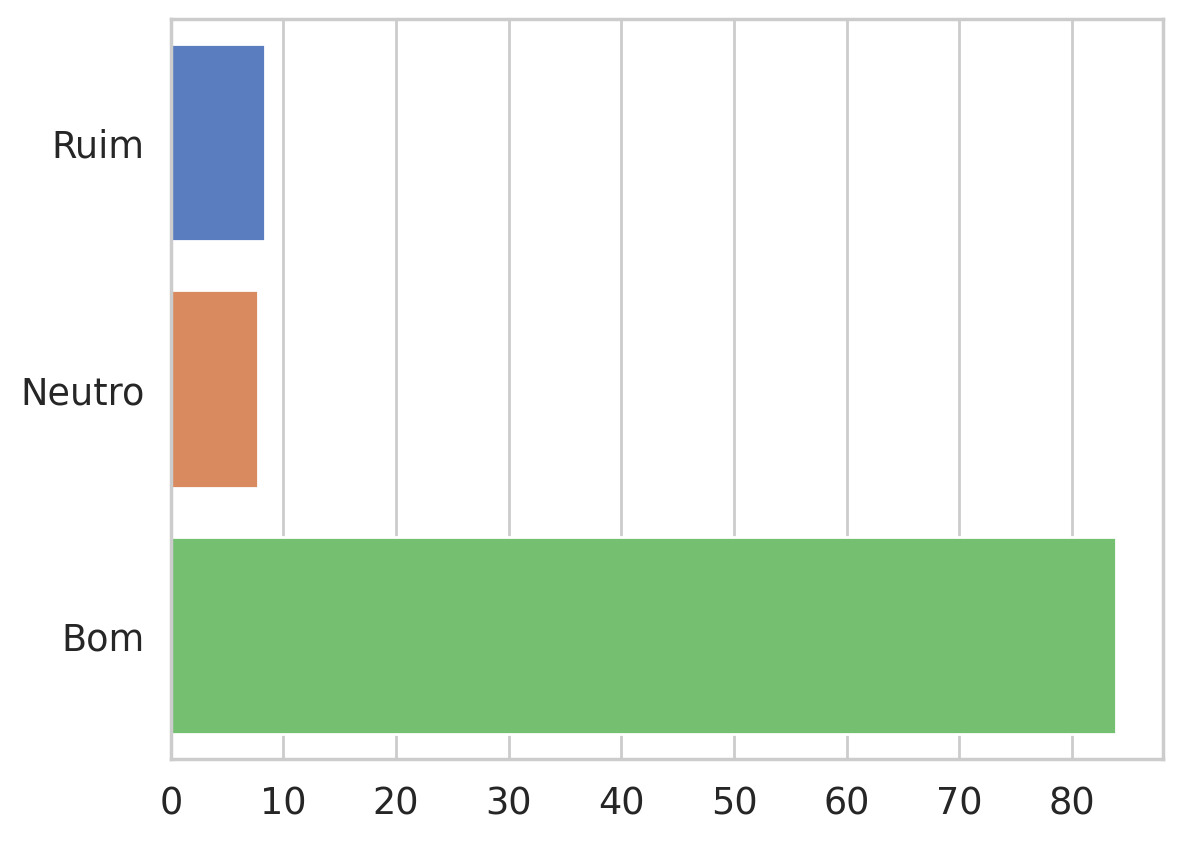

In [195]:
probs_scores = [prob_score_ruim_indeed, prob_score_neutro_indeed, prob_score_alto_indeed]
show_barplot_prob(probs_scores)

## **TESTE MANN WHITNEY**


Ho = NÃO HÁ DIFERENÇA ENTRE AS MEDIANAS DAS NOTAS DA CATHO E INDEED : p > 0.05

Ha = HÁ DIFERENÇA ENTRE AS MEDIANAS DAS NOTAS DA CATHO E INDEED : p <= 0.
05

In [196]:
import scipy.stats as stats

In [197]:
stat, p = stats.mannwhitneyu(catho_df.score, ideed_df.score)
print('Estatística de teste: {}'.format(stat.round(5)))
print('p-valor: {}'.format(p))

Estatística de teste: 169367959.0
p-valor: 3.403692183350946e-212


In [198]:
stat, p = stats.mannwhitneyu(catho_df.score, vagas_df.score)
print('Estatística de teste: {}'.format(stat.round(5)))
print('p-valor: {}'.format(p))

Estatística de teste: 176778524.0
p-valor: 3.765642824594548e-120


In [199]:
stat, p = stats.mannwhitneyu(ideed_df.score, vagas_df.score)
print('Estatística de teste: {}'.format(stat.round(5)))
print('p-valor: {}'.format(p))

Estatística de teste: 207951888.5
p-valor: 7.11333286217067e-17


In [200]:
catho_df.shape, ideed_df.shape, vagas_df.shape

((20000, 11), (20000, 11), (20000, 11))

### **Conclusão**



*   Depois de toda essa análise podemos concluir que os concorrentes entre si tem um percentual bem significante de notas positivas (> 3) o que se deduz que são boas plataformas de vagas para busca de empregos. 
*   Pode-se observar que as notas de avaliações da plataforma Catho obteve um maior desvio padrão ~ 1.66 o que podemos prever que as notas da Catho está menos uniforme, do que seus concorrente, o que podemos confirmar com o grafico de de dispersão e normalidade. 
* Ao analisar a quantidade de notas negativas de cada plataforma na amostra, obtivemos que na Catho a quantidade absoluta de notas 1 (ruim) foi superior aos de seus concorrentes onde se obteve aproximadamente cerca de 4437, contra seus concorrentes Indeed 1094 e Vagas 1694.
* Estatisticamente, com intervalo de confiança de 95%, pode-se concluir que a mediana das notas entre a plataforma Catho e Indeed sejam diferentes entre si.